# Online Food Order Prediction using Machine Learning Model

### This project serves to predict whether or not a customer will to order at a delivery food online application. For this, we have available a dataset which contains many datas about customers like age, gender, marital status, occupation and more. I'm making it using a Machine Learning Model within python programming.

#### Let's doing the firsts neededs imports:

In [39]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

#### Now let's import the dataset and reading its firsts lines:

In [38]:
data = pd.read_csv('onlinefoods.csv')
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

#### As attributes in this dataset we have:

 1 - Age
 2 - Gender
 3 - Marital Status
 4 - Occupation
 5 - Monthly Income
 6 - Educational Qualificatons
 7 - Family Size
 8 - Latitude
 9 - Longitude
 10 - Pin Code
 11 - Output
 12 - Feedbak

#### A way to see the columns names and their types is:

In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


#### Now let's analysing this data. Looking through the ages of these customers, we have this:

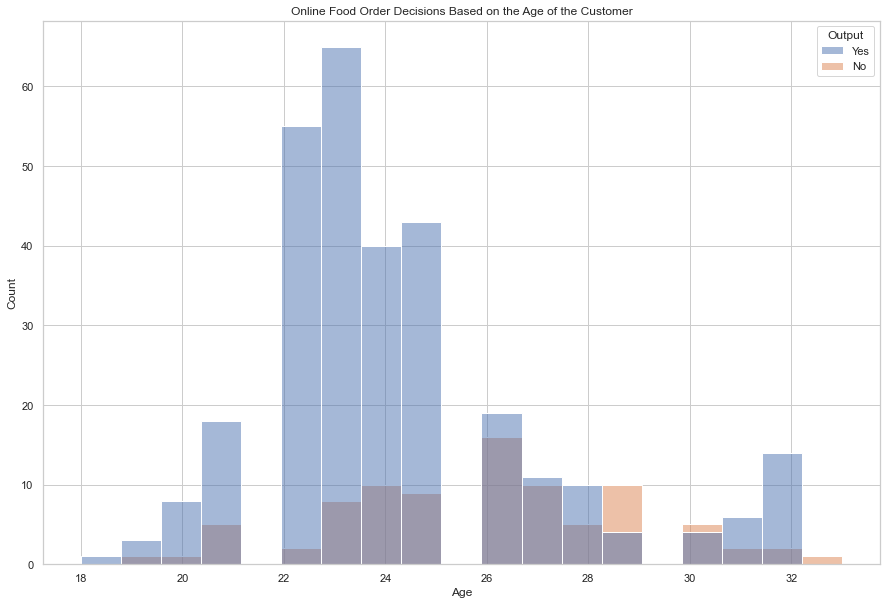

In [36]:
plt.figure(figsize=(15, 10))
plt.title('Online Food Order Decisions Based on the Age of the Customer')
sns.histplot(x='Age', hue='Output', data=data)
plt.show()

#### We can see that the main age of customers that ordered delivery foods again is between 22 and 25 years old. Now take a look at the online food porder decisions based on the family size of this customer:

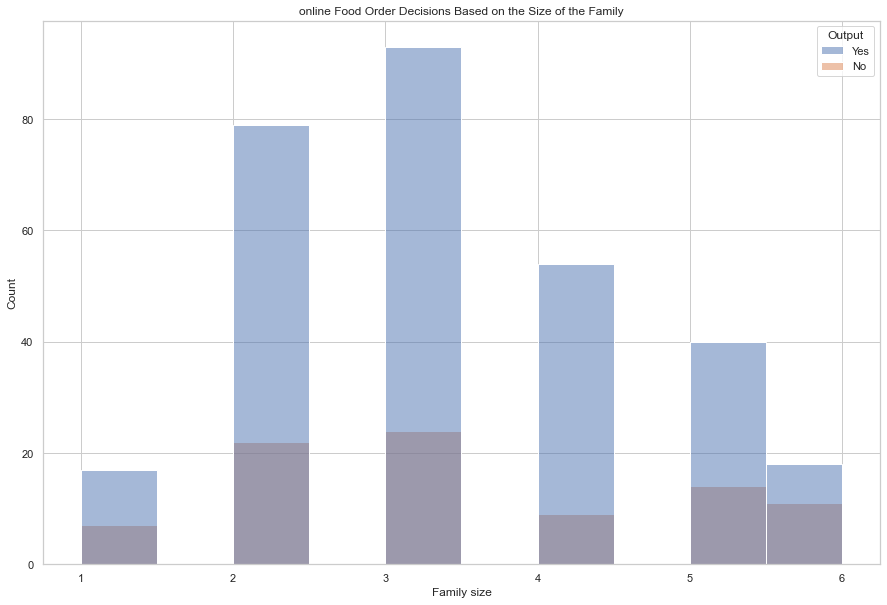

In [35]:
plt.figure(figsize=(15, 10))
plt.title('online Food Order Decisions Based on the Size of the Family')
sns.histplot(x='Family size', hue='Output', data=data)
plt.show()

#### We can see that families with 2 and 3 members are ordering food often. One thing we can do is to create a new dataset that contains only people with output named "yes". Let's do it:

In [34]:
new_data = data.query("Output=='Yes'")
print(new_data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

#### Walking foward, let's take a look at the gender to see who order food more in this context:

In [33]:
gender = new_data['Gender'].value_counts()
label = gender.index
counts = gender.values
colors = ['grey', 'brown']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

#### We can do the same comparison with marital status. Let's do it:

In [32]:
marital_status = new_data['Marital Status'].value_counts()
label = marital_status.index
counts = marital_status.values
colors = ['grey', 'brown']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More According Marital Status')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

#### It became evident that singles people are that has more ordering food online. We can analisys about income groups the same way:

In [31]:
income_groups = new_data['Monthly Income'].value_counts()
label = income_groups.index
counts = income_groups.values
colors = ['grey', 'brown']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More According Monthly Income')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30, marker=dict(colors=colors, line=dict(color='black', width=1)))
fig.show()

#### Wow! We can see that more people no belonging any income group has ordering food online. They can be students, housewives or even unemploeyd people.

## Preparing the data for training a model of machine learning:

In [42]:
data['Gender']=-data['Gender'].map({'Male': 1, 'Female': 0})
data['Marital Status']=data['Marital Status'].map({'Married': 2, 'Single': 1, 'Prefer not to say': 0})
data['Occupation'] = data['Occupation'].map({'Student': 1, 'Employee': 2, 'Self Employeed': 3, 'House wife': 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, "Post Graduate": 2, "Ph.D": 3, "School": 4, "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, "25001 to 50000": 5000, "More than 50000": 7000, "10001 to 25000": 25000, "Below Rs.10000": 1000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1            1000   
2   22      -1               1           1            1000   
3   22       0               1           1               0   
4   22      -1               1           1            1000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

In [44]:
#let's split data

#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", "Monthly Income", "Educational Qualifications", "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

#Now we have to train the machine learning model

# training a machine learning model
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

C:\Users\vinic\AppData\Local\Temp\ipykernel_12316\2090460112.py:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9487179487179487


### We can prepare now a form to input the data of the customer and predict whether the customer will order the food again or not:

In [ ]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input('Age: '))
b = int(input('Gender (1 = Male, 0 = Female): '))
c = int(input('Marital Status(1 = Single, 2 = Married, 3 = Not Revealed): '))
d = int(input('Occupation (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): '))
e = int(input('Monthly Income: '))
f = int(input('Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): '))
g = int(input('Family Size: '))
h = int(input('Pin Code: '))
i = int(input('The customer has given feedback on their last Order (1 = Positive, 0 = Negative): '))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print('Finding if the customer will order again: ', model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again


## This way is how I can train a machine learning model to predict online food orders. This is a useful techniques that food delivery companies can use to make the entire delivery process fast.

Contact:
https://www.linkedin.com/in/viniciusmuniz1/
vinicius-muniz@outlook.com.br
Vinícius Muniz